In [1]:
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

/home/ye12/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [5]:
lambda_params = [float('%.3g' % i) for i in pickle.load(open('equibind_splits/lambda_param', 'rb'))]
calculated_proportions = pickle.load(open('equibind_splits/calculated_proportions', 'rb'))
number_samples = pickle.load(open('equibind_splits/number_samples', 'rb'))

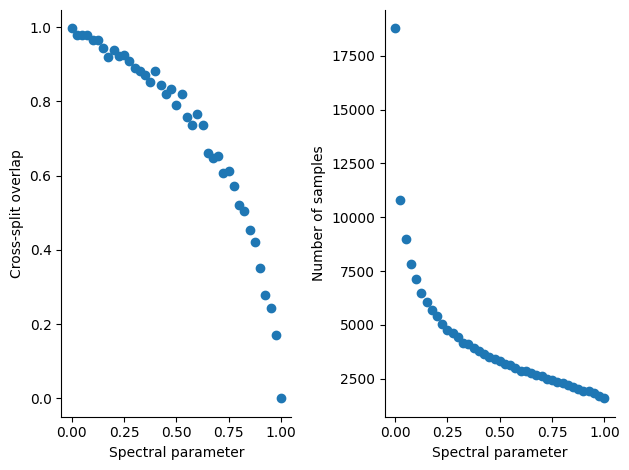

In [6]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=False)
ax1.scatter(lambda_params, calculated_proportions)
ax1.set_ylabel('Cross-split overlap')
ax1.set_xlabel('Spectral parameter')
ax1.spines[['right', 'top']].set_visible(False)
ax2.scatter(lambda_params, number_samples)
ax2.set_ylabel('Number of samples')
ax2.set_xlabel('Spectral parameter')
ax2.spines[['right', 'top']].set_visible(False)
plt.tight_layout()
plt.savefig('PDBBind_Stats.pdf')

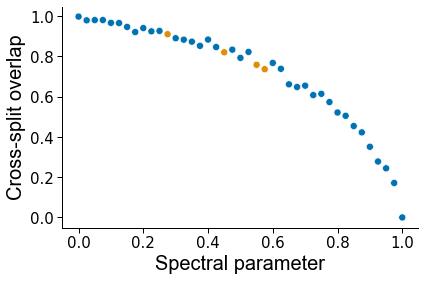

In [58]:
sns.set_palette('colorblind')
df = pd.DataFrame({'x': lambda_params, 'y': calculated_proportions, 'label': [1 if i in [0.55, 0.45, 0.575, 0.275] else 0 for i in lambda_params]})
ax1 = sns.scatterplot(x = 'x', y = 'y', data = df, s = 50, hue= 'label')
ax1.set_ylabel('Cross-split overlap', fontsize=20, family='Arial')
ax1.tick_params(axis='both', which='major', labelsize=15)
ax1.set_xlabel('Spectral parameter', fontsize=20, family='Arial')
sns.set_context("paper")
ax1.get_legend().remove()
plt.tight_layout()
sns.despine()
plt.savefig('PDBind_cross_split_overlap_curve.pdf',  bbox_inches='tight')

In [31]:
def find_closest(overlap, x, y):
    min_difference = 1000000
    best_overlap = None
    best_param = None
    
    
    for i,j in zip(x, y):
        if abs(overlap - j) < min_difference:
            best_param = i
            best_overlap = j
            min_difference = abs(overlap - j)
    
    return f"{best_overlap} and {best_param} for {overlap}"

In [32]:
"""
Precalculated overlaps

Equibind: 276/363 = 0.76
Astex: 70/85 = 0.82
Posebusters: 301/428 = 0.70
LPPDBind: 4347/4826 = 0.90

"""

print(f"Equibind results {find_closest(0.76, lambda_params, calculated_proportions)}")
print(f"Astex results {find_closest(0.82, lambda_params, calculated_proportions)}")
print(f"Posebusters results {find_closest(0.70, lambda_params, calculated_proportions)}")
print(f"LPPDB results {find_closest(0.90, lambda_params, calculated_proportions)}")

Equibind results 0.757527733755943 and 0.55 for 0.76
Astex results 0.8196022727272727 and 0.45 for 0.82
Posebusters results 0.7357859531772575 and 0.5750000000000001 for 0.7
LPPDB results 0.9093851132686084 and 0.275 for 0.9


In [33]:
PDB_results = {
    
        'model': ['Equibind','Equibind', 'Equibind', 
                        'Diffdock', 'Diffdock', 'Diffdock',
                        'Tankbind', 'Tankbind', 'Tankbind'],
               
        'split': ['Equibind', 'Astex', 'Posebusters',
                  'Equibind', 'Astex', 'Posebusters', 
                  'Equibind', 'Astex', 'Posebusters'],
               
        'performance': [0.055, 0.071, 0.02, 0.38, 0.72, 0.38, 0.20, 0.59, 0.16], 
               
         'SP': [0.55, 0.45, 0.575, 0.55, 0.45, 0.575,0.55, 0.45, 0.575]
    
              } 
PDB_results = pd.DataFrame(PDB_results)

In [34]:
PDB_results

,model,split,performance,SP
0,Equibind,Equibind,0.055,0.550
1,Equibind,Astex,0.071,0.450
2,Equibind,Posebusters,0.020,0.575
3,Diffdock,Equibind,0.380,0.550
4,Diffdock,Astex,0.720,0.450
5,Diffdock,Posebusters,0.380,0.575
6,Tankbind,Equibind,0.200,0.550
7,Tankbind,Astex,0.590,0.450
8,Tankbind,Posebusters,0.160,0.575


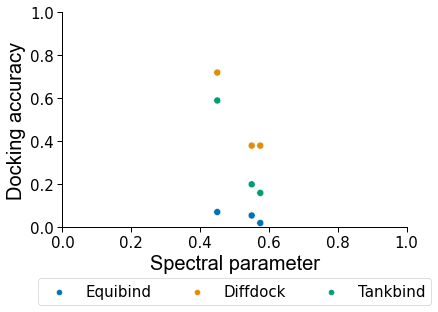

In [41]:
sns.set_palette('colorblind')
ax1 = sns.scatterplot(x = 'SP', y = 'performance', data = PDB_results, hue= 'model', s = 50)
ax1.set_ylabel('Docking accuracy', fontsize=20, family='Arial')
ax1.tick_params(axis='both', which='major', labelsize=15)
ax1.set_xlabel('Spectral parameter', fontsize=20, family='Arial')
ax1.set_xlim(0,1)
ax1.set_ylim(0,1)
sns.set_context("paper")
plt.tight_layout()
plt.legend(prop={'size': 15}, bbox_to_anchor=(0.5, -0.2),loc='upper center', ncol=3)
sns.despine()
plt.savefig('PDBind_Spectral_Performance_Curve.pdf',  bbox_inches='tight')

In [ ]:
#Percent of prediction with RSMD < 2 Angstroms